In [58]:
import pandas as pd
from sklearn.utils import shuffle
from sklearn import svm
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score


In [59]:
#Data Reading

In [61]:
data= pd.read_csv(r"BiomechanicalData.csv")


In [4]:
#The dataset contains 310 records
#See the Shape of data and check the first 5 records of your data

In [62]:
print("Data2 Shape: \n", data.shape)
print("Data2 Head: \n", data.head())

Data2 Shape: 
 (310, 7)
Data2 Head: 
    pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
0         63.027818    22.552586              39.609117     40.475232   
1         39.056951    10.060991              25.015378     28.995960   
2         68.832021    22.218482              50.092194     46.613539   
3         69.297008    24.652878              44.311238     44.644130   
4         49.712859     9.652075              28.317406     40.060784   

   pelvic_radius  degree_spondylolisthesis   class  
0      98.672917                 -0.254400  Hernia  
1     114.405425                  4.564259  Hernia  
2     105.985135                 -3.530317  Hernia  
3     101.868495                 11.211523  Hernia  
4     108.168725                  7.918501  Hernia  


In [6]:
#Shuffling data before training the dataset

In [63]:
shuffledata = shuffle(data)


In [8]:
#Print the first 5 records of the shuffled data

In [64]:
print("DataShuffle head: \n", shuffledata.head())


DataShuffle head: 
      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
113         69.756665    19.279297              48.500000     50.477369   
141         89.504947    48.903653              72.003423     40.601295   
219         64.311867    26.328369              50.958964     37.983498   
189         82.406524    29.276422              77.054565     53.130102   
99          58.521623    13.922286              41.467855     44.599337   

     pelvic_radius  degree_spondylolisthesis              class  
113      96.491370                 51.169640  Spondylolisthesis  
141     134.634291                118.353370  Spondylolisthesis  
219     106.177751                  3.118221             Normal  
189     117.042244                 62.765348  Spondylolisthesis  
99      115.514798                 30.387984  Spondylolisthesis  


In [65]:
#Assign the first 210 records to the Training data
train_data = shuffledata[:210]
#Assign the last 100 records to the Testing data
test_data = shuffledata[-100:]

In [66]:
#Check the shape and head of the training and testing data
print("Train Data2 Shape: \n", train_data.shape)
print("Train Data2 head: \n", train_data.head())
print("Test Data2 Shape: \n", test_data.shape)
print("Test Data2 head: \n", test_data.head())

Train Data2 Shape: 
 (210, 7)
Train Data2 head: 
      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
113         69.756665    19.279297              48.500000     50.477369   
141         89.504947    48.903653              72.003423     40.601295   
219         64.311867    26.328369              50.958964     37.983498   
189         82.406524    29.276422              77.054565     53.130102   
99          58.521623    13.922286              41.467855     44.599337   

     pelvic_radius  degree_spondylolisthesis              class  
113      96.491370                 51.169640  Spondylolisthesis  
141     134.634291                118.353370  Spondylolisthesis  
219     106.177751                  3.118221             Normal  
189     117.042244                 62.765348  Spondylolisthesis  
99      115.514798                 30.387984  Spondylolisthesis  
Test Data2 Shape: 
 (100, 7)
Test Data2 head: 
      pelvic_incidence  pelvic_tilt  lumbar_lordosis_ang

In [85]:
#Assign the first 6 column names as the Train Features
trainFeaturesData = list(train_data.columns[:6])
#print("Features: \n", trainFeaturesData)

In [84]:
#Get the data under these 6 columns
trainFeatures = train_data[trainFeaturesData]
#print("Train Features: \n", trainFeatures.head())

In [83]:
#Get the data under the 'class' column
trainClass = train_data["class"]
#print("Training data Class: \n", trainClass.head())


In [70]:

#Create a SVM Classifier
#classifier = svm.SVC(kernel='rbf', C=1, gamma=0.001)
#classifier = svm.SVC(kernel='rbf', C=1, gamma=0.167) #auto
classifier = svm.SVC(kernel='rbf', C=2.2, gamma=0.001)
#classifier = svm.SVC(kernel='rbf')

In [71]:
#Using the Training data to build the classifier
classifier.fit(trainFeatures, trainClass)
print("SVM Classifier: \n", classifier)

SVM Classifier: 
 SVC(C=2.2, gamma=0.001)


In [72]:
# get support vectors
supportVectors = classifier.support_vectors_
print("Support Vectors: \n", supportVectors)

Support Vectors: 
 [[ 46.85578065  15.35151393  38.          31.50426672 116.2509174
    1.66270559]
 [ 41.72996308  12.25407408  30.12258646  29.475889   116.5857056
   -1.24440249]
 [ 36.68635286   5.01088412  41.9487509   31.67546874  84.24141517
    0.66443712]
 [ 68.83202098  22.21848205  50.09219357  46.61353893 105.9851355
   -3.53031731]
 [ 54.91944259  21.06233245  42.19999999  33.85711014 125.2127163
    2.43256144]
 [ 54.12492019  26.65048856  35.32974693  27.47443163 121.447011
    1.57120482]
 [ 66.87921138  24.89199889  49.27859673  41.9872125  113.4770183
   -2.00589175]
 [ 38.69791243  13.44474904  31.          25.25316339 123.1592507
    1.42918576]
 [ 48.91555137  19.96455616  40.26379358  28.95099521 119.321358
    8.02889463]
 [ 43.92283983  14.17795853  37.8325467   29.7448813  134.4610156
    6.45164764]
 [ 50.20966979  29.76012218  36.10400731  20.44954761 128.2925148
    5.74061408]
 [ 40.55735663  17.97778407  34.          22.57957256 121.0462458
   -1.53738307

In [73]:
# get indices of support vectors
supportVectorIndices = classifier.support_
print("Support Vector Indices: \n", supportVectorIndices)


Support Vector Indices: 
 [ 13  22  35  37  46  49  52  59  66  72  78  79  88  89 112 120 130 133
 146 147 150 160 162 165 166 168 173 186 190 202 204 207   2   5   6  10
  20  24  26  29  36  38  43  44  51  55  60  61  62  67  71  75  84  87
  91 104 114 115 119 124 127 128 131 135 142 145 149 152 163 169 176 179
 180 185 196 205   1  19  21  23  27  32  41  45  50  56  63  69  77  83
  85  90  93  99 103 116 117 118 121 136 139 143 151 153 156 157 159 161
 174 178 182 188 197 199 203]


In [86]:
# get number of support vectors for each class - In Ascending Order
supportVectorCount = classifier.n_support_
print("Support Vectors Count: \n", supportVectorCount)
print("Support Vectors Count for 'Abnormal' Class: \n", supportVectorCount[0])
print("Support Vectors Count for 'Normal' Class: \n", supportVectorCount[1])

Support Vectors Count: 
 [32 44 39]
Support Vectors Count for 'Abnormal' Class: 
 32
Support Vectors Count for 'Normal' Class: 
 44


In [87]:
#Now take the Testing data:--------------------------------------------------------------------------
#Get the first 6 column names of the Test data and assign it to the Test Features (tFeatures)
tFeatures = list(test_data.columns[:6])
print("Features: \n", tFeatures)


Features: 
 ['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'pelvic_radius', 'degree_spondylolisthesis']


In [76]:
#Get the data of the Test Features
testFeatures = test_data[tFeatures]
print("Test Features: \n", testFeatures.head())

Test Features: 
      pelvic_incidence  pelvic_tilt  lumbar_lordosis_angle  sacral_slope  \
147         55.080766    -3.759930              56.000000     58.840695   
6           53.432928    15.864336              37.165934     37.568592   
72          84.974132    33.021175              60.859873     51.952957   
277         65.756348    13.206926              44.000000     52.549422   
262         42.517272    14.375671              25.323565     28.141601   

     pelvic_radius  degree_spondylolisthesis  
147     109.915367                 31.773583  
6       120.567523                  5.988551  
72      125.659534                 74.333409  
277     129.393573                 -1.982120  
262     128.905689                  0.757020  


In [88]:
#Use the classifier to predict the class of the Testing data
testPrediction = classifier.predict(testFeatures)
#print("Test Prediction: \n", testPrediction)

In [89]:
#For measuring parameters like Accuracy, Recall and Precision, compare this Predicted class with the Actul class of the Testing data
#Get the Actual class of the Testing data
testClass = list(test_data["class"])
#print("Test Actual Class: \n", testClass)

In [90]:
#Creating a Confusion Matrix for the Actual Vs Prediction
confusionMatrix = confusion_matrix(testClass, testPrediction)
print("Confusion Matrix: \n", confusionMatrix)

Confusion Matrix: 
 [[13  8  0]
 [ 4 26  0]
 [ 0  2 47]]


In [91]:
#Measuring the Accuracy, Precision and Recall scores of the Classifier
#Accuracy is measured for the entire classifier, while Precision and Recall are computed for each class
print("Accuracy of the Classifier: %.2f" %(100*accuracy_score(testClass, testPrediction)),"%")


Accuracy of the Classifier: 86.00 %


In [92]:
print("Support Vectors Count: \n", supportVectorCount)
print(supportVectorCount[0]+supportVectorCount[1])


Support Vectors Count: 
 [32 44 39]
76


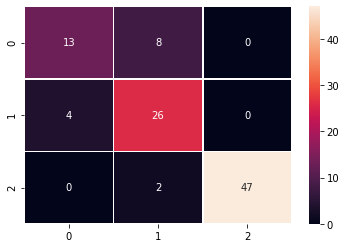

In [82]:
#When you set xticklabels=True, yticklabels=True in the Heatmap function, it automatically provides the labels for Confusion matrix with 0s, 1s and 2s in the Ascending order of the Class labels  
#Use this to find out the labels of the Confusion Matrix:
import seaborn as sns
sns.heatmap(confusionMatrix, annot=True, linewidths=.5, xticklabels=True, yticklabels=True);

In [28]:
#After you find out the labels in the Confusion Matrix, remove the xticklabels & yticklabels parameters. Set the labels manually now
#annot=True to annotate cells - This provides labels(numbers) in the Confusion Matrix

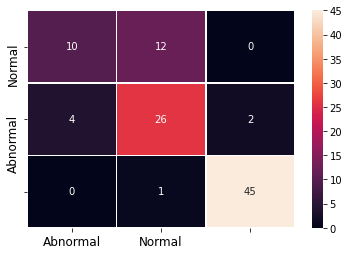

In [29]:
import seaborn as sns
sns.heatmap(confusionMatrix, annot=True, linewidths=.5);
import matplotlib.pyplot as plt
from pylab import *
ax = gca()              
ax.xaxis.set_ticklabels(['Abnormal', 'Normal'], fontsize=12); ax.yaxis.set_ticklabels(['Normal', 'Abnormal'], fontsize=12);


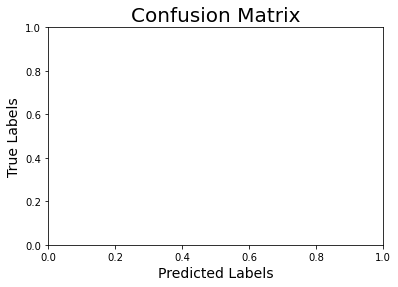

In [93]:
#Setting the labels, title and tick marks
#Usually in the Confusion Matrix, the Y-Axis represents the True Values and X-Axis represents the Predicted Values
ax = gca()              
ax.set_title('Confusion Matrix', fontsize=20);
ax.set_xlabel('Predicted Labels', fontsize=14);
ax.set_ylabel('True Labels', fontsize=14); 

In [94]:
#ax.plot()
plt.show()

In [95]:
#print(type(supportVectors))
#Changing the Support Vectors array into a Data Frame
supportVectorsdf = pd.DataFrame(supportVectors)


In [96]:
#Storing the first column of the SupportVectors dataframe as col1df
col1df=  supportVectorsdf[supportVectorsdf.columns[0:1]]
#print("Support Vectors 1st Column: \n", col1df)

In [34]:
"""
#Minimum value of the column
#axis=0 for Columns & axis=1 for rows

col1min = col1df.min(axis=0)
print("Minimum value of Column 1:",col1min)

#Maximum value of the column

col1max = col1df.max(axis=0)
print("Maximum value of Column 1:",col1max)

#Range of the column
range1= col1max-col1min
print("Range of Column 1: ", range1)

#Summary statistics of the column
print("Column 1 Summary:", col1df.describe())"""



'\n#Minimum value of the column\n#axis=0 for Columns & axis=1 for rows\n\ncol1min = col1df.min(axis=0)\nprint("Minimum value of Column 1:",col1min)\n\n#Maximum value of the column\n\ncol1max = col1df.max(axis=0)\nprint("Maximum value of Column 1:",col1max)\n\n#Range of the column\nrange1= col1max-col1min\nprint("Range of Column 1: ", range1)\n\n#Summary statistics of the column\nprint("Column 1 Summary:", col1df.describe())'

In [98]:
#Summary statistics of the column 1
print("Column 1 Summary: \n", col1df.describe())

#Range of Column 1
#axis=0 for Columns & axis=1 for rows
range1= col1df.max(axis=0)-col1df.min(axis=0)
print("Range of Column 1: ", range1)

########################################

col2df=  supportVectorsdf[supportVectorsdf.columns[1:2]]
#print("Support Vectors 2nd Column: \n", col2df)

#Summary statistics of the column 2
print("Column 2 Summary: \n", col2df.describe())

#Range of Column 2
range2= col2df.max(axis=0)-col2df.min(axis=0)
print("Range of Column 2: ", range2)

########################################

col3df=  supportVectorsdf[supportVectorsdf.columns[2:3]]
#print("Support Vectors 3rd Column: \n", col3df)

#Summary statistics of the column 3
print("Column 3 Summary: \n", col3df.describe())

#Range of Column 3
range3= col3df.max(axis=0)-col3df.min(axis=0)
print("Range of Column 3: ", range3)

########################################

col4df=  supportVectorsdf[supportVectorsdf.columns[3:4]]
#print("Support Vectors 4th Column: \n", col4df)

#Summary statistics of the column 4
print("Column 4 Summary: \n", col4df.describe())

#Range of Column 4
range4= col4df.max(axis=0)-col4df.min(axis=0)
print("Range of Column 4: ", range4)

########################################

col5df=  supportVectorsdf[supportVectorsdf.columns[4:5]]
#print("Support Vectors 5th Column: \n", col5df)

#Summary statistics of the column 5
print("Column 5 Summary: \n", col5df.describe())

#Range of Column 5
range5= col5df.max(axis=0)-col5df.min(axis=0)
print("Range of Column 5: ", range5)

########################################

col6df=  supportVectorsdf[supportVectorsdf.columns[5:6]]
#print("Support Vectors 6th Column: \n", col6df)

#Summary statistics of the column 6
print("Column 6 Summary: \n", col6df.describe())

#Range of Column 6
range6= col6df.max(axis=0)-col6df.min(axis=0)
print("Range of Column 6: ", range6)


Column 1 Summary: 
                 0
count  115.000000
mean    58.717813
std     17.358313
min     30.149936
25%     45.094733
50%     56.030218
75%     68.776965
max    118.144655
Range of Column 1:  0    87.994718
dtype: float64
Column 2 Summary: 
                 1
count  115.000000
mean    19.009556
std     10.381991
min     -6.554948
25%     13.437397
50%     17.212673
75%     22.667093
max     49.431864
Range of Column 2:  1    55.986812
dtype: float64
Column 3 Summary: 
                 2
count  115.000000
mean    50.254714
std     20.585324
min     15.500000
25%     34.228770
50%     47.000000
75%     62.880378
max    125.742385
Range of Column 3:  2    110.242385
dtype: float64
Column 4 Summary: 
                 3
count  115.000000
mean    39.708257
std     13.351317
min     13.516568
25%     30.825478
50%     37.405357
75%     44.817532
max     79.695154
Range of Column 4:  3    66.178585
dtype: float64
Column 5 Summary: 
                 4
count  115.000000
mean   118.8637

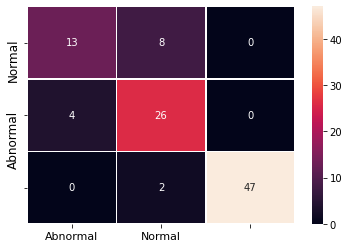

In [99]:
import seaborn as sns
sns.heatmap(confusionMatrix, annot=True, linewidths=.5);
import matplotlib.pyplot as plt
from pylab import *
ax = gca()              
ax.xaxis.set_ticklabels(['Abnormal', 'Normal'], fontsize=11); ax.yaxis.set_ticklabels(['Normal', 'Abnormal'], fontsize=12);